 ## HW3 - EuroSAT Land Use and Land Cover Classification using Deep Learning

Nissim Lebovits
March 17, 2023

In this homework your task is to implement traditional and DL models to solve a typical problem in satellite imaging  using a benchmark dataset.

### Notes:

For this assignment, I have used a number of additional sources, including [this Kaggle tutorial](https://www.kaggle.com/code/nilesh789/land-cover-classification-with-eurosat-dataset), ChatGPT, and Github Copilot.

### S1: Reading and Preparing the Data

#### Importing the Data

First, we'll import our libraries and read in our data.

In [4]:
# Importing few libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url = 'C:/Users/Nissim/Desktop/Spring 2023/Remote Sensing/MUSA-650_Spring2023/Homeworks/EuroSAT_RGB/2750'

labels = os.listdir(url)

print(labels)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


#### Exploring the Data

We can take a look at the data to see the distribution by class.

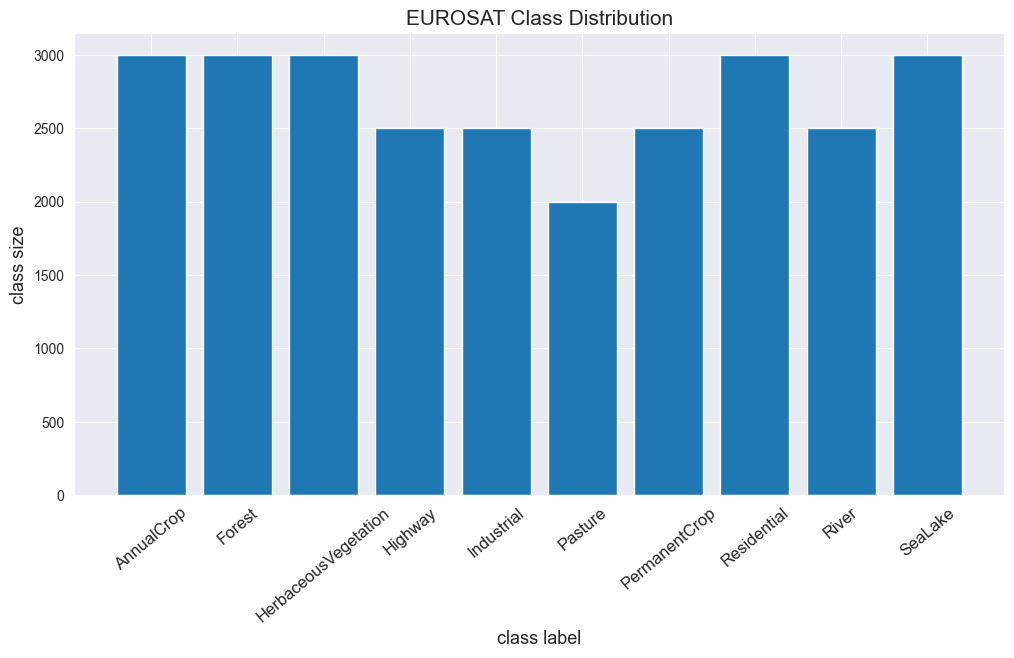

In [7]:
# plot class distributions of whole dataset
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(url, l)))


plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15);

We can also visualize sample images from each class.

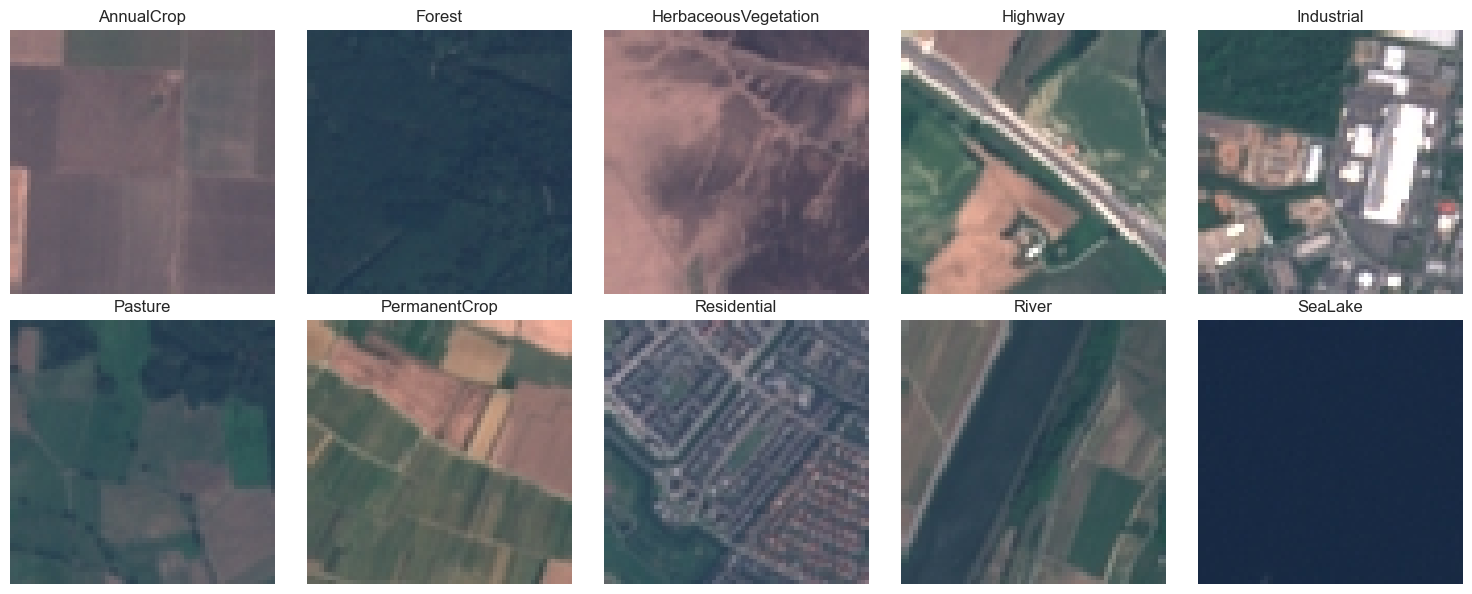

In [23]:
# plot one image from each class in a 2x5 grid
plt.figure(figsize=(15, 6))

for i, l in enumerate(labels):
    plt.subplot(2, 5, i+1)
    img = PIL.Image.open(os.path.join(url, l, os.listdir(os.path.join(url, l))[0]))
    plt.imshow(img)
    plt.title(l)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Filtering for the 3 Classes

#### Splitting the Data